In [1]:
import sys
sys.path.append('src')
# from src import helperfunctions as hf
from src import SABR
from src.SABR_IV_approximators import AntonovANN, AntonovApprox, Hagan, AntonovExact

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import swifter
import seaborn as sns

import matplotlib.pyplot as plt
save_path = r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Plots"

In [2]:
ANN = AntonovANN()
DATA_PATH = r'C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Data\training_data'

### Unprocessed data
Neural network implied vol and relative error is calculated here

In [14]:
# data = pd.read_pickle(DATA_PATH + '/heatmap_data.pkl').reset_index(drop=True)
# data['AntonovANN'] = data[['alpha', 'rho', 'v', 'K', 'T']].swifter.apply(lambda x: ANN.calc_iv(x[0], .5, x[1], x[2], (x[3], 1), x[4]), axis=1)
# data['relative error'] = np.abs(data['AntonovANN'] - data['impl_volatility']) / np.abs(data['impl_volatility'])
# data.to_pickle(DATA_PATH + '/heatmap_data_processed.pkl')

### Already processed data, saves some time

In [3]:
data = pd.read_pickle(DATA_PATH + '/heatmap_data_processed.pkl')
# Remove extreme outliers
data.loc[data['relative error'] > data['relative error'].quantile(.995),'relative error'] = np.nan

In [4]:
df = data[['T', 'K', 'relative error']]
df['K2'] = pd.cut(df['K'], bins=25)
df['K_bin'] = df['K2'].apply(lambda x: np.round(x.right, 2))
df['T2'] = pd.cut(df['T'], bins=20)
df['T_bin'] = df['T2'].apply(lambda x: np.round(x.right, 1))

### Mean relative error

Text(33.0, 0.5, '$T$ (years)')

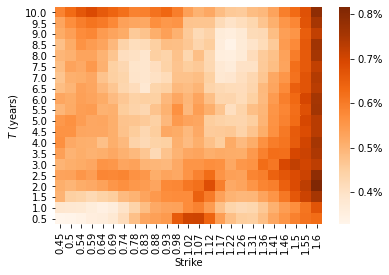

In [5]:
pivot_mean = pd.pivot_table(df, values='relative error', index=['T_bin'], columns=['K_bin'], aggfunc='mean')
pivot_mean = pivot_mean.iloc[::-1] # reverse years index
pivot_mean *= 100
ax = sns.heatmap(pivot_mean, cmap='Oranges', cbar_kws={'format': '%.1f%%'})
plt.xlabel('Strike')
plt.ylabel('$T$ (years)')

### Std

Text(33.0, 0.5, '$T$ (years)')

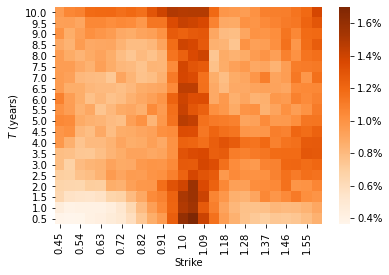

In [69]:
pivot_std = pd.pivot_table(df, values='relative error', index=['T_bin'], columns=['K_bin'], aggfunc='std')
pivot_std = pivot_std.iloc[::-1] # reverse years index
pivot_std *= 100
sns.heatmap(pivot_std, cmap='Oranges', cbar_kws={'format': '%.1f%%'})
plt.xlabel('Strike')
plt.ylabel('$T$ (years)')
# plt.savefig(save_path + '/heatmap_std.eps', bbox_inches='tight')
